for n = 1 ,energy:2.3914810664178063e-19
for n = 2 ,energy:9.565924265671225e-19
for n = 5 ,energy:5.9787026660445154e-18


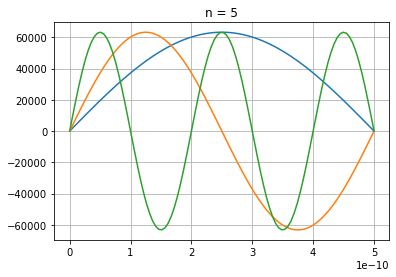

In [18]:
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import numpy as np
%matplotlib inline

#  This function calculates the energy and plots the wavefunction for a specified value of n.
def plot_eigenfunction(m, hbar, L, n):
    x = np.linspace(0, L, 100)
    y = np.sqrt(2/L) * np.sin(n * np.pi * x/ L )
    
    plt.plot(x, y)
    plt.grid()
    
    print('for n = ' + str(n),',energy:' +str((n**2 * np.pi** 2 * hbar**2 ) / (2 * m * L**2) ))
    
    plt.title( 'n = ' + str(n))
    
    
 #  Parameters:  mass of electron, Planck's constrant, and the width of pur box.
m = 9.1e-31
hbar = 1.05e-34
L = 5e-10   

#  Plot the results for n = 1
a0=plot_eigenfunction(m, hbar, L, 1)
a1=plot_eigenfunction(m, hbar, L, 2)
a4=plot_eigenfunction(m, hbar, L, 5)
plt.show()

Text(0, 0.5, '$\\psi$')

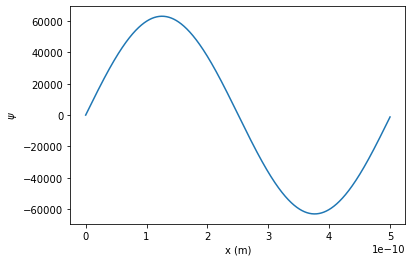

In [29]:
#  Our differential equation
def equation(x, y, E):
    m = 9.1e-31
    hbar = 1.05e-34
    
    yprime = np.zeros(2)
    
    yprime[0] = y[1]
    yprime[1] = -2 * m * E / hbar**2 * y[0]
    
    return yprime

#  x is out spatial variable
x = np.linspace(0, L, 1000)
xspan = (x[0], x[-1])

#  This is the eugenvalue.  We adjust it so we have the proper boundary conditions
#  This value is for n = 2.
E = 9.5e-19

#  Initial conditions.  The derivative isn't right, but this doesn't matter.
y0 = [0, 1]

#  Calculate the unnormalized solution
sol = solve_ivp(lambda x, y: equation(x, y, E), xspan, y0, t_eval = x)
psi = sol.y[0, :]

#  Normalize
area = np.trapz(psi**2, x)
psi = psi / np.sqrt(area)

plt.plot(x, psi)
#plt.grid()
plt.xlabel('x (m)')
plt.ylabel('$\psi$')